<a href="https://colab.research.google.com/github/DevMehta22/AdvancedPythonLab/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [ ]:
df.fillna(df.mean(), inplace=True)
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('target', axis=1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['target'],
test_size=0.2, random_state=42)

In [ ]:
tree_clf = DecisionTreeClassifier()
# Train the model
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

Decision Tree Accuracy: 100.00%


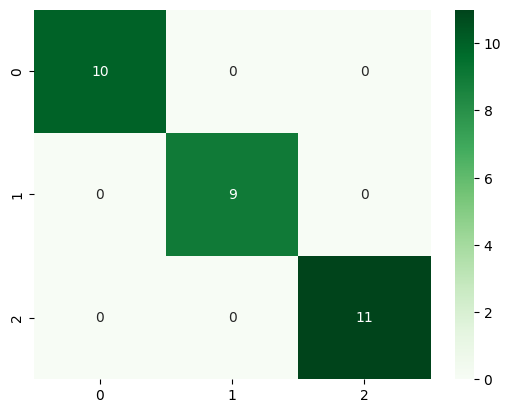

In [ ]:
y_pred_tree = tree_clf.predict(X_test)
# Accuracy score
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree * 100:.2f}%")
# Confusion Matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_matrix_tree, annot=True, fmt="d", cmap="Greens")
plt.show()

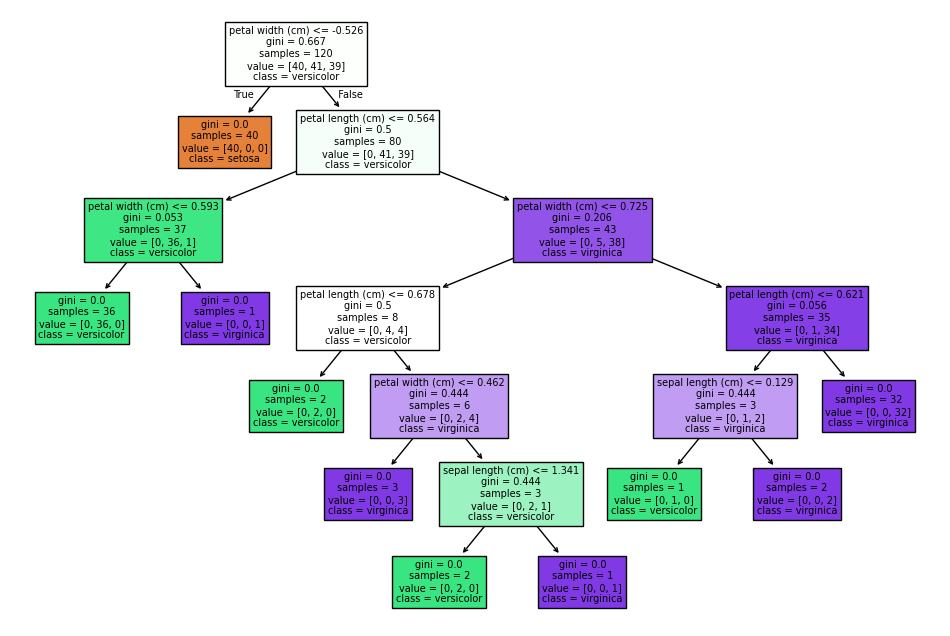

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, filled=True, feature_names=data.feature_names,
class_names=data.target_names)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, None],
    'max_features': ['sqrt', 'log2', None]
}
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:",grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'max_features': None, 'n_estimators': 10}


In [ ]:
y_pred_rf = grid_search.best_estimator_.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

Random Forest Accuracy: 100.00%


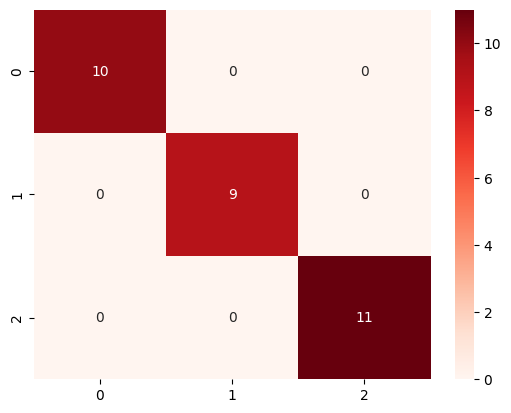

In [ ]:
conf_matrix_tree_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_tree_rf, annot=True, fmt="d", cmap="Reds")
plt.show()

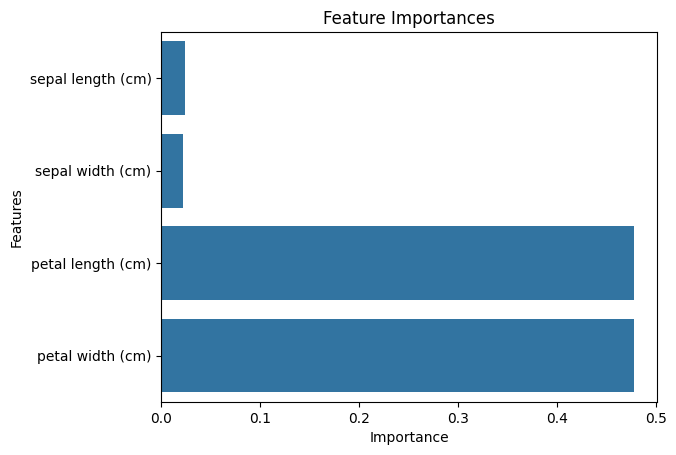

In [ ]:
importances = grid_search.best_estimator_.feature_importances_
feature_names = data.feature_names
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()